In [48]:
# https://www.youtube.com/watch?v=DOHg16zcUCc

#!/usr/bin/python
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [49]:
START_DATE ='2005-01-01'
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))
print(END_DATE)

2020-03-05


In [50]:
# Function 3 - get stats

def get_stats(stock_data):
    return {
        'last': np.mean(stock_data.tail(1)),
        'short_mean': np.mean(stock_data.tail(20)),
        'long_mean': np.mean(stock_data.tail(200)),
        'short_rolling': stock_data.rolling(window=20).mean(),
        'long_rolling': stock_data.rolling(window=200).mean()
    }

In [51]:
#Function 2 - Clean Data

def clean_data(stock_data, col):
    weekdays = pd.date_range(start=START_DATE, end=END_DATE)
    clean_data = stock_data[col].reindex(weekdays)
    return clean_data.fillna(method='ffill')

In [73]:
# function 4 - plot

def create_plot(stock_data, ticker):
    stats = get_stats(stock_data)
    
    plt.style.use('classic') 
    #for other styles see: https://matplotlib.org/3.1.3/gallery/style_sheets/style_sheets_reference.html
    
    plt.subplots(figsize=(12,8))
    plt.plot(stock_data, label=ticker)
    plt.plot(stats['short_rolling'], label='20 day rolling mean')
    plt.plot(stats['long_rolling'], label='200 day rolling mean')
    plt.xlabel('Date')
    plt.ylabel('Adj Close (p)')
    plt.legend()
    plt.title('Stock price over time')
    
    plt.show()

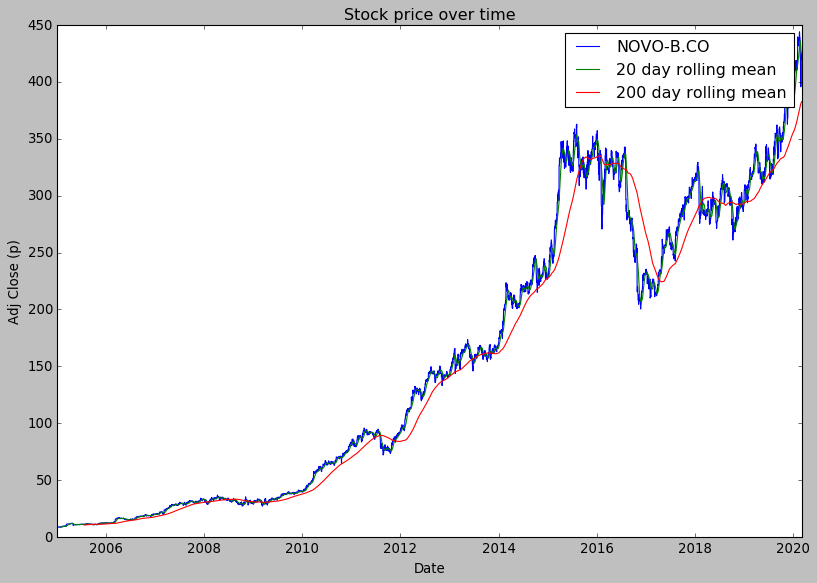

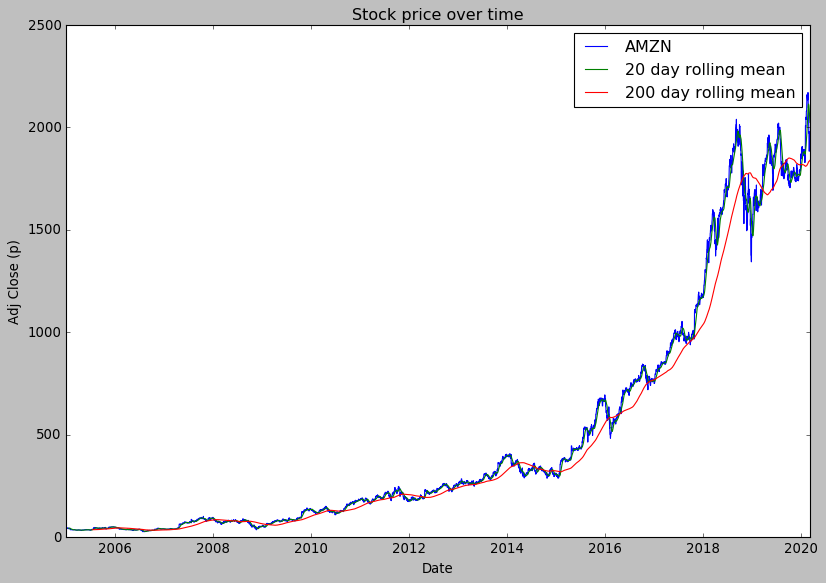

In [75]:
# Function 1 : get the data
# As am example we extract data for Amazon and No

STOCK_1 = 'NOVO-B.CO'
STOCK_2 = 'AMZN'

def get_data(ticker):
    try:
        stock_data = data.DataReader(ticker, 'yahoo', START_DATE, END_DATE)
        adj_close = clean_data(stock_data, 'Adj Close')
        create_plot(adj_close,ticker)
    except RemoteDataError:
        print('No data found for {t}'.format(t=ticker))
        
get_data(UK_STOCK)
get_data(USA_STOCK)